In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read in dataset
relief_df = pd.read_csv("cleaned_PPP.csv", low_memory=False)

In [3]:
#check rows and columns
relief_df.shape

(379515, 30)

In [4]:
#find non numeric rows in data, these are invalid rows
relief_df[pd.to_numeric(relief_df['Total'], errors='coerce').isnull()]

,LoanNumber,DateApproved_Year,DateApproved_Month,LoanStatusDate_Year,LoanStatusDate_Month,LoanStatus,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,...,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,ForgivenessAmount,ForgivenessDate_Year,ForgivenessDate_Month,Borough,Total
65395,LoanNumber,DateApproved_Year,DateApproved_Month,LoanStatusDate_Year,LoanStatusDate_Month,LoanStatus,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,...,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,ForgivenessAmount,ForgivenessDate_Year,ForgivenessDate_Month,Borough,Total
125057,LoanNumber,DateApproved_Year,DateApproved_Month,LoanStatusDate_Year,LoanStatusDate_Month,LoanStatus,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,...,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,ForgivenessAmount,ForgivenessDate_Year,ForgivenessDate_Month,Borough,Total
175308,LoanNumber,DateApproved_Year,DateApproved_Month,LoanStatusDate_Year,LoanStatusDate_Month,LoanStatus,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,...,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,ForgivenessAmount,ForgivenessDate_Year,ForgivenessDate_Month,Borough,Total
220437,LoanNumber,DateApproved_Year,DateApproved_Month,LoanStatusDate_Year,LoanStatusDate_Month,LoanStatus,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,...,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,ForgivenessAmount,ForgivenessDate_Year,ForgivenessDate_Month,Borough,Total
272255,LoanNumber,DateApproved_Year,DateApproved_Month,LoanStatusDate_Year,LoanStatusDate_Month,LoanStatus,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,...,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,ForgivenessAmount,ForgivenessDate_Year,ForgivenessDate_Month,Borough,Total
318904,LoanNumber,DateApproved_Year,DateApproved_Month,LoanStatusDate_Year,LoanStatusDate_Month,LoanStatus,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,...,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,ForgivenessAmount,ForgivenessDate_Year,ForgivenessDate_Month,Borough,Total
359210,LoanNumber,DateApproved_Year,DateApproved_Month,LoanStatusDate_Year,LoanStatusDate_Month,LoanStatus,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,...,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,ForgivenessAmount,ForgivenessDate_Year,ForgivenessDate_Month,Borough,Total


In [5]:
#filter out invalid rows
relief_df = relief_df.drop([65395, 125057,175308,220437,272255,318904,359210], axis=0)

In [6]:
#check business types listed in dataset
relief_df["BusinessType"].value_counts()

Corporation                            105213
Sole Proprietorship                     99756
Limited  Liability Company(LLC)         54449
Independent Contractors                 38592
Self-Employed Individuals               33529
Subchapter S Corporation                31548
Non-Profit Organization                  5924
Partnership                              3260
Limited Liability Partnership            2282
Single Member LLC                        1379
Cooperative                              1287
Professional Association                 1183
Housing Co-op                             418
501(c)3 – Non Profit                      328
501(c)6 – Non Profit Membership            71
Non-Profit Childcare Center                36
Trust                                      31
Joint Venture                              30
Qualified Joint-Venture (spouses)          22
Employee Stock Ownership Plan(ESOP)        18
Tenant in Common                            7
501(c)19 – Non Profit Veterans    

In [7]:
#filter for only businesses of interest
business_types = ["Corporation", "Sole Proprietorship", "Limited  Liability Company(LLC)", "Subchapter S Corporation",
                    "Partnership", "Limited Liability Partnership", "Single Member LLC", "Cooperative"]

relief_df = relief_df[relief_df["BusinessType"].isin(business_types)]

relief_df["Total"]

# Statistics

In [8]:
#Calculate CostPerJob as Total / # of Jobs reported

relief_df["JobsReported"] = relief_df["JobsReported"].astype(int)
relief_df["Total"] = relief_df["Total"].astype(int)

relief_df["CostPerJob"] = relief_df["Total"] /  relief_df["JobsReported"]

In [10]:
#filter out outliers by IQR
relief_df["CostPerJob"].astype(float)

#calculate IQR
quartile1 = relief_df["CostPerJob"].quantile(0.25)
quartile3 = relief_df["CostPerJob"].quantile(0.75)
interquartilerange = quartile3 - quartile1


print(interquartilerange)

#filter out rows 
relief_df = relief_df[~((relief_df["CostPerJob"] < (quartile1 - 1.5 * interquartilerange)) |
               (relief_df["CostPerJob"] > (quartile3 + 1.5 * interquartilerange)))]


12703.0


In [11]:
#Generate summary statistics about CostPerJob, grouped by Borough and JobsReported (ranges)
grouped = relief_df.groupby(["Borough" , pd.cut(relief_df['JobsReported'], [0, 1, 2, 5, 10, 20, 50, 100])])["CostPerJob"] \
                                                            .agg(median_cost=np.nanmedian,
                                                                 average_cost=np.mean,
                                                                 standard_deviation=np.std,
                                                                 minimum = np.min,
                                                                 maximum = np.max,
                                                                 count = len)


In [12]:
grouped

median_cost  average_cost  standard_deviation  \
Borough       JobsReported                                                   
Bronx         (0, 1]        15517.000000  13855.237628         6932.709975   
              (1, 2]         4712.500000   6192.380150         4668.134878   
              (2, 5]         4777.333333   6309.366451         4668.199087   
              (5, 10]        6763.375000   7819.183758         4931.394463   
              (10, 20]       7430.494737   8573.998634         5291.378841   
              (20, 50]       7990.627907   9144.204529         5571.926244   
              (50, 100]      7927.054054   8419.357953         6097.695965   
Brooklyn      (0, 1]        14587.500000  13572.096818         7099.987342   
              (1, 2]         6075.000000   8018.323345         5925.640416   
              (2, 5]         5900.400000   7504.134832         5400.936630   
              (5, 10]        6795.571429   8065.109500         5229.918693   
              (10, 20]       7458.714286   8434.023480         5088.041132   
              (20, 50]       7298.400000   8309.801940         5545.785647   
              (50, 100]      6745.175595   7318.832143         6167.276219   
Manhattan     (0, 1]        15225.000000  14235.369791         7305.623322   
              (1, 2]        10396.500000  11308.762483         7097.051707   
              (2, 5]        10010.250000  11197.126074         6930.733947   
              (5, 10]       10896.428571  11790.832016         6834.284641   
              (10, 20]      11270.583333  12100.380475         6895.526491   
              (20, 50]      11573.500000  12249.578748         6953.425515   
              (50, 100]     11909.463158  12090.467141         7100.879311   
Queens        (0, 1]        13230.000000  12784.490423         7050.119299   
              (1, 2]         5062.500000   6787.477410         5157.852109   
              (2, 5]         5660.833333   7113.883898         5004.887509   
              (5, 10]        6837.500000   7916.208312         5018.681022   
              (10, 20]       7690.600000   8767.580377         5462.777126   
              (20, 50]       7849.347826   9033.916881         6164.874089   
              (50, 100]      7460.144589   8626.038344         7217.656695   
Staten Island (0, 1]        12901.000000  12895.047123         7124.437024   
              (1, 2]         6202.500000   8200.971278         6240.657849   
              (2, 5]         5808.000000   7271.637576         5258.699951   
              (5, 10]        6596.000000   7645.140393         5158.509079   
              (10, 20]       6852.727273   8054.287657         5305.984236   
              (20, 50]       6729.689177   8417.927079         6254.131255   
              (50, 100]      5941.063993   7959.566718         6845.927784   

                               minimum       maximum  count  
Borough       JobsReported                                   
Bronx         (0, 1]        126.000000  36225.000000  20490  
              (1, 2]         88.500000  36571.000000   2136  
              (2, 5]         90.666667  35693.250000   4095  
              (5, 10]        83.333333  34755.000000   2122  
              (10, 20]      192.750000  32601.529412   1338  
              (20, 50]      187.500000  34375.000000    869  
              (50, 100]     121.098592  30968.328125    259  
Brooklyn      (0, 1]        102.000000  36732.000000  41170  
              (1, 2]        134.500000  36637.000000   8927  
              (2, 5]         59.000000  36742.000000  14435  
              (5, 10]        63.200000  36450.700000   8795  
              (10, 20]      138.250000  35777.562500   5427  
              (20, 50]       52.900000  36000.000000   3305  
              (50, 100]      46.875000  34482.741379    976  
Manhattan     (0, 1]          4.000000  36827.000000  33546  
              (1, 2]         79.500000  36716.500000  11456  
              (2, 5]      

In [13]:
grouped.reset_index(inplace=True)

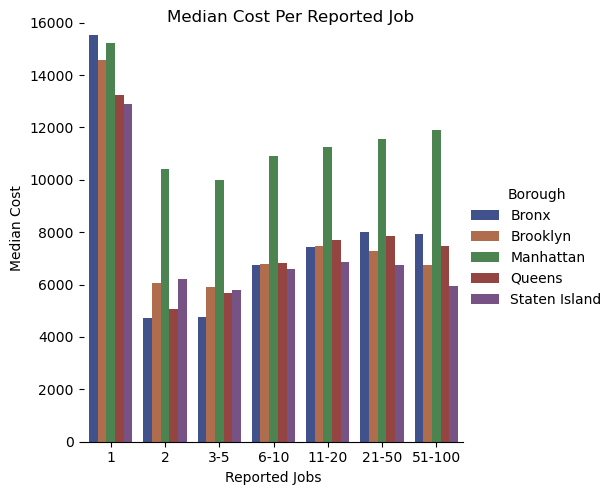

In [14]:
#plot Median Cost Per Reported Job
g = sns.catplot(
    data=grouped, kind="bar",
    x="JobsReported", y="median_cost", hue="Borough",
    errorbar="sd", palette="dark", alpha=.8, height=5
)
g.despine(left=True)
g.set_axis_labels("Reported Jobs", "Median Cost")
g.set_xticklabels(['1','2','3-5','6-10','11-20','21-50','51-100'])
g.legend.set_title("Borough")
g.fig.suptitle("Median Cost Per Reported Job")
plt.show()

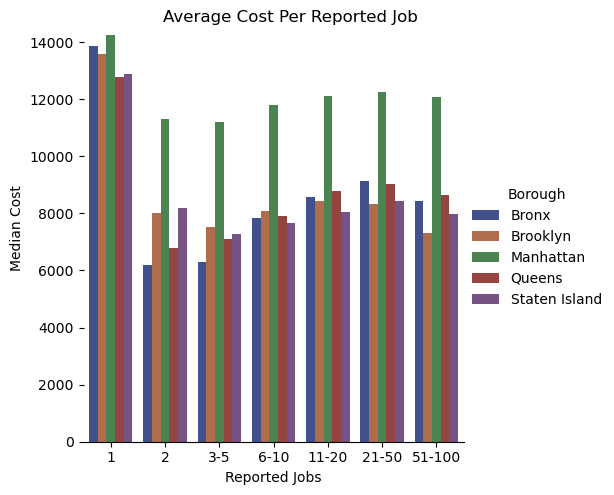

In [15]:
#plot Average Cost Per Reported Job
g = sns.catplot(
    data=grouped, kind="bar",
    x="JobsReported", y="average_cost", hue="Borough",
    errorbar="sd", palette="dark", alpha=.8, height=5
)
g.despine(left=True)
g.set_axis_labels("Reported Jobs", "Median Cost")
g.set_xticklabels(['1','2','3-5','6-10','11-20','21-50','51-100'])
g.legend.set_title("Borough")
g.fig.suptitle("Average Cost Per Reported Job")
plt.show()

# Total

In [20]:
grouped_total = relief_df.groupby([pd.cut(relief_df['JobsReported'], [0, 1, 2, 5, 10, 20, 50, 100])])["Total"] \
                                                                .agg(median_cost=np.nanmedian,
                                                                     average_cost=np.mean,
                                                                     standard_deviation=np.std,
                                                                     minimum = np.min,
                                                                     maximum = np.max,
                                                                     count = len)

In [29]:
grouped_total

,JobsReported,median_cost,average_cost,standard_deviation,minimum,maximum,count
0,"(0, 1]",14580.0,13551.537895,7135.360565,4,36827,134965
1,"(1, 2]",13462.0,17628.235663,12937.743088,159,73433,31214
2,"(2, 5]",25997.0,33545.500969,25558.853199,167,183779,54195
3,"(5, 10]",61156.0,73510.591978,50430.917942,500,366999,34530
4,"(10, 20]",126895.0,149197.147609,99306.250584,1000,721031,22187
5,"(20, 50]",281962.5,330836.656896,234784.972808,1587,1800000,15488
6,"(50, 100]",650180.5,719065.900915,530525.052094,2100,3114017,5026


In [23]:
grouped_total.reset_index(inplace=True)

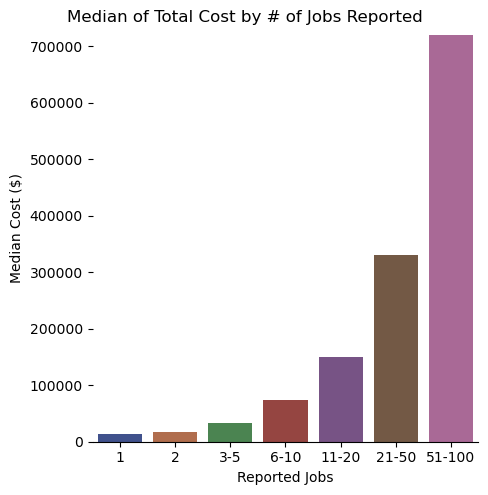

In [35]:
g = sns.catplot(
    data=grouped_total, kind="bar",
    x="JobsReported", y="average_cost",
    errorbar="sd", palette="dark", alpha=.8, height=5
)
g.despine(left=True)
g.set_axis_labels("Reported Jobs", "Median Cost ($)")
g.set_xticklabels(['1','2','3-5','6-10','11-20','21-50','51-100'])
g.fig.suptitle("Median of Total Cost by # of Jobs Reported")
plt.show()

(array([14743., 21929., 17136., 14451., 14786., 48636.,  1385.,  1140.,
          519.,   240.]),
 array([4.00000e+00, 3.68630e+03, 7.36860e+03, 1.10509e+04, 1.47332e+04,
        1.84155e+04, 2.20978e+04, 2.57801e+04, 2.94624e+04, 3.31447e+04,
        3.68270e+04]),
 <BarContainer object of 10 artists>)

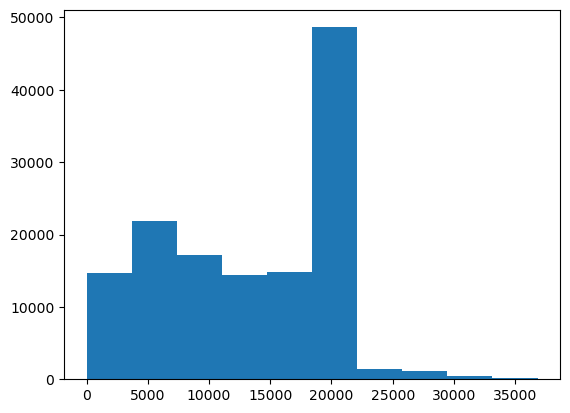

In [37]:
plt.hist(relief_df[relief_df["JobsReported"] == 1]["CostPerJob"])

In [41]:
relief_df["Total"].value_counts().head(20)

20833    13477
20832     8145
20831     3284
20830     2279
20800     1823
20829     1122
20000     1050
20828      964
12500      942
10000      896
15000      817
5000       815
7500       751
25000      618
6250       523
2500       465
18750      362
17500      360
3750       343
6500       321
Name: Total, dtype: int64

In [ ]:
 #add processing method, maybe conduct entity resolution, look into 20833? maybe delete